In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer 

breast = load_breast_cancer()

In [2]:
breast_data = breast.data 

In [3]:
breast_input = pd.DataFrame(breast_data)

In [4]:
breast_labels = breast.target 

In [5]:
labels = np.reshape(breast_labels,(569,1))

In [6]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [7]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names 

In [8]:
features_labels = np.append(features,'label')

In [9]:
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
X = breast_dataset.iloc[:, 0:30].values 
Y = breast_dataset.iloc[:, 30].values 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
#Scaling the data using Standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X2 = sc_X.fit_transform(X)

In [13]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [14]:
Y_pred = classifier.predict(X_test)
Y_pred[0:10]

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1.])

In [15]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [16]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


Text(0.5, 257.44, 'Predicted label')

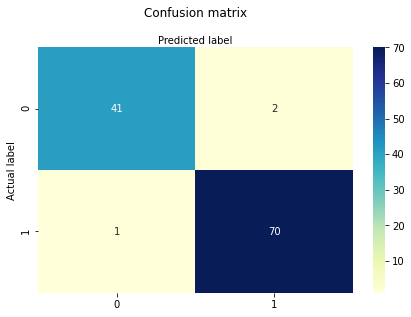

In [17]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [18]:
##Problem 2






In [19]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10) 
principalComponents = pca.fit_transform(X2) 
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10']) 
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159368,-0.398405,-0.157119,-0.877412
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240988,-0.711903,1.107000
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668165,0.097375,0.024062,0.454289
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059567,-1.405445,-1.116953
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936214,0.636376,-0.263804,0.377695
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596128,-0.035472,0.987927,0.257000
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716325,-1.113360,-0.105208,-0.108623
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192757,0.341886,0.393917,0.520885
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223080,-0.280237,-0.542036,-0.089304


In [20]:
finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)

In [21]:
X2_data = finalDf.iloc[:,0:10]
Y2_data = finalDf.iloc[:,10]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_data, Y2_data,test_size = 0.2, random_state = 42)
X2_train

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
68,4.330003,9.202526,1.492963,0.319947,4.728171,2.215765,-2.581058,1.299151,3.784121,-2.738139
181,9.007166,0.581031,-3.134715,-0.862270,0.045722,0.725774,0.845889,-0.591536,-1.015622,1.202651
63,-2.314132,3.267990,2.796224,0.565726,-0.381834,2.958283,0.210564,-0.627979,-0.232324,0.041396
248,-2.582556,0.729213,-0.548143,-2.332079,-1.835265,0.140166,0.121965,0.272864,0.609654,0.350469
60,-2.385836,2.757658,1.214086,1.794489,-3.338158,2.540784,0.746437,-0.910743,0.262431,1.319033
...,...,...,...,...,...,...,...,...,...,...
71,-0.307856,7.387812,3.819086,2.133556,2.710703,-1.639758,2.428365,1.318261,-1.885130,3.192658
106,-0.749271,1.797639,-0.568366,-0.560499,-0.933096,-1.610187,-0.498351,-0.453244,0.527567,-0.459635
270,-4.506563,-3.169273,-0.188062,0.391160,1.385207,1.138779,0.149404,0.142013,-0.429720,0.348543
435,0.664441,0.436861,-2.680782,-0.729227,-0.027787,-1.082051,-0.001051,-0.127619,-0.009938,-0.481076


In [22]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X2_train, Y2_train)

LogisticRegression(random_state=0)

In [23]:
Y2_pred = classifier.predict(X2_test)
Y2_pred[0:10]

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1.])

In [24]:
"""accuracy = []
precision = []
recall = []"""

'accuracy = []\nprecision = []\nrecall = []'

In [25]:
#accuracy.append(metrics.accuracy_score(Y2_test, Y2_pred)) 
#precision.append(metrics.precision_score(Y2_test, Y2_pred)) 
#recall.append(metrics.recall_score(Y2_test, Y2_pred)) 

In [26]:
#pltArray = [1,2,3,4,5, 6, 7, 8, 9, 10]
#plt.scatter(pltArray,accuracy, color='blue', marker='D')

In [27]:
#plt.scatter(pltArray,precision, color='red', marker='D')

In [28]:
#plt.scatter(pltArray,recall, color='green', marker='D')

In [29]:
#Problem 3





In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,Y) 

In [35]:
from sklearn.naive_bayes import GaussianNB 

classifier = GaussianNB() 


X3_train,X3_test,Y3_train,Y3_test = train_test_split(X,Y,test_size=0.2) 
lda.fit(X3_train,Y3_train) 
Y3_pred = lda.predict(X3_test) 
print(metrics.accuracy_score(Y3_test,Y3_pred))
print(metrics.precision_score(Y3_test,Y3_pred))
print(metrics.recall_score(Y3_test,Y3_pred))

[[1.575e+01 2.025e+01 1.026e+02 ... 1.479e-01 3.993e-01 1.064e-01]
 [1.129e+01 1.304e+01 7.223e+01 ... 8.750e-02 2.733e-01 8.022e-02]
 [1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]
 ...
 [1.495e+01 1.757e+01 9.685e+01 ... 1.667e-01 3.414e-01 7.147e-02]
 [1.719e+01 2.207e+01 1.116e+02 ... 1.984e-01 3.216e-01 7.570e-02]
 [1.328e+01 1.372e+01 8.579e+01 ... 9.173e-02 2.736e-01 7.320e-02]]

[[1.575e+01 2.025e+01 1.026e+02 ... 1.479e-01 3.993e-01 1.064e-01]
 [1.129e+01 1.304e+01 7.223e+01 ... 8.750e-02 2.733e-01 8.022e-02]
 [1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]
 ...
 [1.495e+01 1.757e+01 9.685e+01 ... 1.667e-01 3.414e-01 7.147e-02]
 [1.719e+01 2.207e+01 1.116e+02 ... 1.984e-01 3.216e-01 7.570e-02]
 [1.328e+01 1.372e+01 8.579e+01 ... 9.173e-02 2.736e-01 7.320e-02]]
0.9298245614035088
0.9452054794520548
0.9452054794520548
